# MNIST Handwritten Digit Recognizer using Deep CNN

Contributors:
- Sejal Raj (055041)
- Vidushi Rawat (055056
)

## Problem Statement:

Handwritten digit recognition is essential for automating tasks in various domains, but traditional methods face difficulties due to the inherent variability of handwriting. This project focuses on building a deep CNN model to overcome these limitations. By utilizing the power of deep learning, we aim to create a system that can accurately classify handwritten digits, reducing errors and manual effort in real-world applications.



## Project Structure

1. Importing Libraries
2. Preparing the Dataset
3. Model Building
4. Model Fitting
5. Model Analysis
6. Predicting using test data


##Data Analysis
###1. Importing the Libraries
Tensorflow v2 - An open-source machine learning framework from Google.
Keras - An open-source neural network library running on top of TensorFlow.
###2. Preparing the Dataset
We utilized the MNIST Handwritten Digit Recognition dataset. read_csv loaded the dataset into a pandas DataFrame. The label column was extracted and stored in Y_srvr41560428train, representing the target variable. The pixel values were stored in X_srvr4156train for model input.

A countplot visualized the distribution of digit classes. Missing values were checked to ensure data integrity.

####2.1. Normalisation
Normalization scaled input values for efficient model training. Pixel values (0-255) were divided by 255, transforming the range to [0,1]. This aids faster convergence and stable gradient updates.

####2.2. Reshaping
Pixel value arrays were reshaped into (28,28,1) matrices, matching the CNN input shape.

####2.3. Encoding
Labels were one-hot encoded to match the CNN output vector, enabling effective classification.

####2.4. Train-Test Split
The data was split into training (srvr4156train) and validation sets to evaluate model generalization and prevent overfitting or underfitting.

###3. Model Building
A Deep Convolutional Neural Network (CNN) based on the LeNet-5 architecture was implemented.

The model structure is:

Input → [[Conv2D → ReLU] × 2 → MaxPool2D → Dropout] × 2 → Flatten → Dense → Dropout → Output

Data augmentation (zooming, rotating, flipping, cropping) expanded the dataset. RMSProp and ReduceLROnPlateau were used for optimization.

###4. Model Fitting
The model was trained on the dataset, leveraging Kaggle's GPU support for faster convergence.

###5. Prediction using test Data
Predictions were made on the test dataset and saved to a CSV file for submission.

## Observations

### **Importing Libraries** - Successful import of all required libraries: TensorFlow, Keras, Pandas, and Matplotlib.

### **Preparing the Dataset** - MNIST dataset loaded and preprocessed successfully.
- Dataset split into **training** and **validation** sets for improved generalization.
- **Countplot** confirmed balanced distribution of digit classes.
- No missing values detected in the dataset.
- Pixel values normalized from **[0,255] to [0,1]** for enhanced training efficiency.

### **Model Building** - **LeNet-5 architecture** implemented for efficient digit recognition.
- Network structure included **convolutional, pooling, dropout, and fully connected output layers**.
- **Data Augmentation** used to expand dataset and improve model generalization.
- **RMSProp optimizer** and **ReduceLROnPlateau** learning rate adjustment employed for better convergence.

### **Model Fitting** - Training conducted on Kaggle with **GPU acceleration**, reducing computation time.
- Loss and accuracy improved consistently across epochs.
- Training and validation losses monitored to prevent overfitting.

### **Model Analysis** - **Learning curve** showed decreasing training and validation losses, indicating successful training.
- **Confusion matrix** revealed strong performance across most digit classes, with some misclassifications.
- Observed errors highlighted potential areas for model improvement.

### **Predicting Using Test Data** - Trained model used to generate predictions on the test dataset.
- Predictions saved to a **CSV file** for competition submission.
- Final model demonstrated strong performance, consistent with validation accuracy.







## Managerial Insights

**Automation Potential:**

* The CNN model's high accuracy in classifying handwritten digits presents a strong opportunity for automated data entry systems.
* This is particularly relevant for sectors like banking, postal services, and form digitization, where it can drastically reduce manual errors and accelerate processing times.

**Cost-Effectiveness:**

* Employing deep learning-based recognition offers a path to significant labor cost reductions associated with manual digit transcription.
* Furthermore, the use of data augmentation optimizes model performance without necessitating extensive datasets, thereby minimizing data acquisition expenses.

**Scalability & Adaptability:**

* The model's architecture allows for fine-tuning to recognize characters across diverse languages and handwriting styles, broadening its applicability in sectors such as finance, healthcare, and government document processing.

**Performance vs. Infrastructure:**

* While CNNs are powerful, they demand substantial computational resources, notably GPUs.
* Organizations can strategically employ cloud-based AI services to achieve a cost-effective balance between performance and infrastructure requirements when scaling these models.

**Error Handling & Continuous Improvement:**

* The confusion matrix reveals misclassification patterns, indicating potential biases towards certain digits.
* Utilizing active learning and consistently retraining the model with updated data can enhance accuracy over time.

**Strategic Decision-Making:**

* Before implementing AI-driven handwriting recognition, businesses should evaluate their data availability, infrastructure capabilities, and regulatory compliance.
* The model's success in digit recognition demonstrates a compelling business case for integrating AI into process automation.

## 1. Importing the Libraries

In [1]:
!pip install tensorflow

In [2]:
# Importing Tensorflow and keras

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

TensorFlow Version:   2.19.0
Keras Version:   3.8.0


## 2. Preparing the Dataset

In [3]:
# Train Data

import pandas as pd
!pip install gdown
!gdown 1dqjEk1bza1L12-IQYOCs0Rbc9IHmqr3z

try:
  srvr4156train = pd.read_csv("mnist_train.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1dqjEk1bza1L12-IQYOCs0Rbc9IHmqr3z
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:00<00:00, 90.9MB/s]
File imported successfully


In [4]:
# Test Data

!pip install gdown

!gdown 1YiDZfgRO89NWqQWySf2Fq3R779LemviE

try:
  srvr4156test = pd.read_csv("test.csv")
  print("File imported successfully")
except FileNotFoundError:
  print("File not found.")

Downloading...
From: https://drive.google.com/uc?id=1YiDZfgRO89NWqQWySf2Fq3R779LemviE
To: /content/test.csv
100% 51.1M/51.1M [00:00<00:00, 328MB/s]
File imported successfully


In [5]:
Y_srvr4156train = srvr4156train['label']

#Dropping Label Column
X_srvr4156train = srvr4156train.drop(labels=['label'],axis=1)

#free up some space
del srvr4156train

Y_srvr4156train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [6]:
#Checking for any null or missing values
X_srvr4156train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [7]:
srvr4156test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


### Normalisation

In [8]:
X_srvr4156train = X_srvr4156train/255
srvr4156test = srvr4156test/255

### Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.

In [9]:
X_srvr4156train = X_srvr4156train.values.reshape(-1,28,28,1)

In [10]:
srvr4156test = srvr4156test.values.reshape(-1,28,28,1)

### Label Encoding

In [11]:
Y_srvr4156train = tf.keras.utils.to_categorical(Y_srvr4156train, num_classes=10)
#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

### Train and Validation Data Split


In [12]:
#Spliting srvr4156train
X_srvr4156train,X_val,Y_srvr4156train,Y_val = train_test_split(X_srvr4156train,Y_srvr4156train,test_size=0.1,
                                                random_state = 55004156)

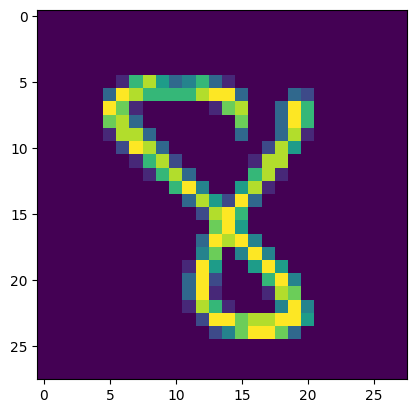

In [13]:
#An image sample

g = plt.imshow(X_srvr4156train[0][:,:,0])

## 3. Model Building

In [14]:
#CNN Architecture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 ->
                           #Flatten -> Dense -> Dropout -> Out
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
srvr4156_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [16]:
#Compiling Model

model.compile(optimizer = srvr4156_optimizer, loss='categorical_crossentropy',
             metrics=["accuracy"])

In [17]:
#Setting Learning rate annealer

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

In [18]:
srvr4156_epochs=10
srvr4156_batch_size = 112

In [19]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_srvr4156train)

## 4. Model Fitting

In [20]:
if(tf.test.is_built_with_cuda() == True):
    print("CUDA Available.")
else:
    print("CUDA not Available.")

CUDA Available.


In [21]:
#Fitting the model
# Commenting it since no need to run it again

history = model.fit(datagen.flow(X_srvr4156train, Y_srvr4156train, batch_size=srvr4156_batch_size),
                    epochs=srvr4156_epochs,
                    validation_data=(X_val, Y_val),
                    verbose=2,
                    steps_per_epoch=X_srvr4156train.shape[0] // srvr4156_batch_size,
                    callbacks=[learning_rate_reduction])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


337/337 - 184s - 546ms/step - accuracy: 0.8556 - loss: 0.4351 - val_accuracy: 0.9774 - val_loss: 0.0734 - learning_rate: 1.0000e-03
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


337/337 - 6s - 18ms/step - accuracy: 0.9464 - loss: 0.1819 - val_accuracy: 0.9814 - val_loss: 0.0650 - learning_rate: 1.0000e-03
Epoch 3/10
337/337 - 175s - 518ms/step - accuracy: 0.9637 - loss: 0.1185 - val_accuracy: 0.9876 - val_loss: 0.0487 - learning_rate: 1.0000e-03
Epoch 4/10
337/337 - 5s - 16ms/step - accuracy: 0.9821 - loss: 0.0613 - val_accuracy: 0.9855 - val_loss: 0.0525 - learning_rate: 1.0000e-03
Epoch 5/10
337/337 - 174s - 515ms/step - accuracy: 0.9743 - loss: 0.0830 - val_accuracy: 0.9876 - val_loss: 0.0427 - learning_rate: 1.0000e-03
Epoch 6/10
337/337 - 5s - 16ms/step - accuracy: 0.9732 - loss: 0.0851 - val_accuracy: 0.9876 - val_loss: 0.0474 - learning_rate: 1.0000e-03
Epoch 7/10
337/337 - 174s - 515ms/step - accuracy: 0.9786 - loss: 0.0686 - val_accuracy: 0.9907 - val_loss: 0.0384 - learning_rate: 1.0000e-03
Epoch 8/10
337/337 - 5s - 16ms/step - accuracy: 0.9911 - loss: 0.0143 - val_accuracy: 0.9895 - val_loss: 0.0430 - learning_rate: 1.0000e-03
Epoch 9/10
337/337 - 1

In [22]:
# Saving the model for further faster processing

model.save("CNNmodel.keras", include_optimizer = True)

In [23]:
from tensorflow.keras.models import load_model

# Define a custom object to map 'softmax_v2' to 'softmax'
custom_objects = {'softmax_v2': tf.keras.activations.softmax}
cnn_model = load_model("CNNmodel.keras", custom_objects=custom_objects)

## 5. Analyzing the model

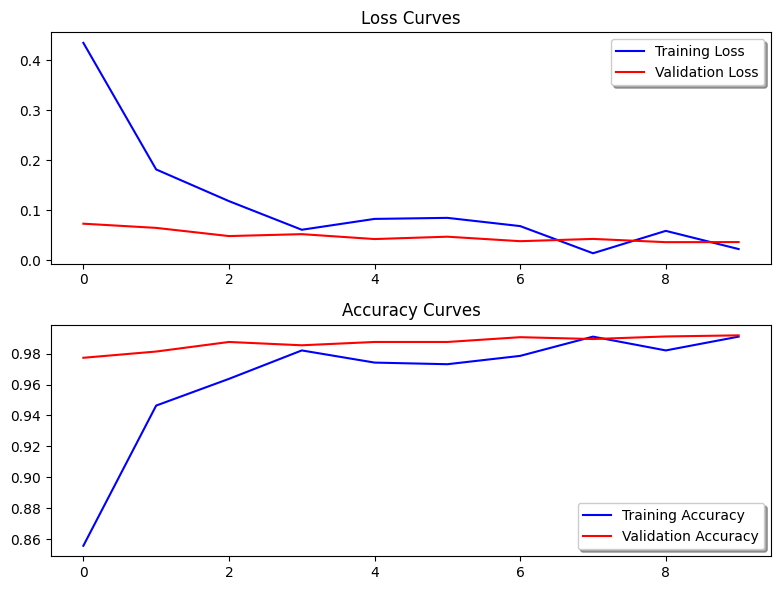

In [24]:
# The loss and accuracy curves for training and validation

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Loss Curves')

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Accuracy Curves')

plt.tight_layout()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step


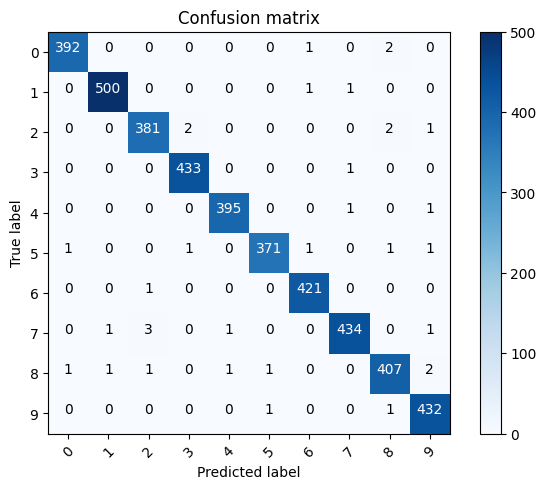

In [25]:
# plotting confussion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

### Important Error

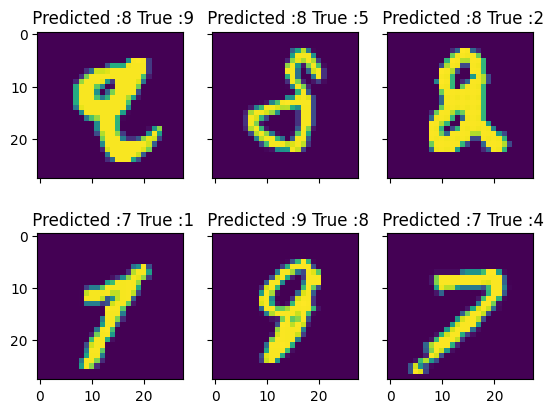

In [26]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Predicting the test data

In [27]:
# predict results
results = cnn_model.predict(srvr4156test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step


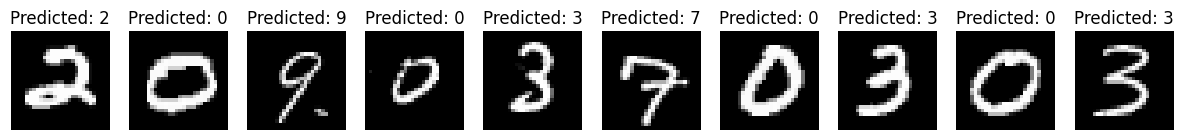

In [28]:
import matplotlib.pyplot as plt

# Assuming 'results' contains predicted labels and 'srvr4156test' contains test images
# Select a subset of images to display (e.g., the first 10)
num_images_to_display = 10
images = srvr4156test[:num_images_to_display]
predicted_labels = results[:num_images_to_display]

# Create a figure and axes for the images
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

# Iterate through the images and display them with their predicted labels
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
    ax.set_title(f"Predicted: {predicted_labels[i]}")  # Set the title with the predicted label
    ax.axis('off')  # Turn off the axes

plt.show()  # Show the figure

In [29]:
import os
import numpy as np
from PIL import Image
import zipfile

# Create a ZIP file to store the images
output_zip = 'predicted_images.zip'

# Open a new ZIP file in write mode
with zipfile.ZipFile(output_zip, 'w') as zipf:
    # Iterate through the test images and save them with predicted labels
    for i, image in enumerate(srvr4156test):
        predicted_label = results[i]  # Get the predicted label for the current image
        image_data = (image.reshape(28, 28) * 255).astype(np.uint8)  # Reshape and scale to 0-255
        image = Image.fromarray(image_data, mode='L')  # Create a PIL Image object

        # Generate a temporary filename with .jpg extension
        image_filename = f'image_{i}_predicted_{predicted_label}.jpg'

        # Save the image as JPG
        image.save(image_filename, format='JPEG')

        # Add the file to the ZIP archive
        zipf.write(image_filename)

        # Remove the temporary file
        os.remove(image_filename)

print(f"Images saved to '{output_zip}' file.")


Images saved to 'predicted_images.zip' file.


In [30]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)